# Representación de Datos Geográficos

Existen muchas veces en las que los datos que se tratan de visualizar están relacionados con un espacio geográfico. En muchos casos, el visualizar simplemente los nombres de los lugares (o direcciones postales o coordenadas geográficas) no permite hacerse una buena idea de las relaciones que tienen los datos precisamente por su cercanía geográfica.

En estos casos, resulta interesante visualizar los datos sobre mapas que representan en diferente detalle las regiones geográficas.

En este tutorial emplearemos la biblioteca llamada `geopandas`. Como su nombre indica, se trata de una extensión de la biblioteca `pandas` que incluye facilidades para trabajar con datos geo-espaciales.

En caso de que se esté no se haya instalado previamente esta librería en el sistema (por ejemplo en Google Colaboratory), se puede instalar fácilmente con una de estas 2 opciones (la primera suele ser más genérica):

In [87]:
# ! pip install geopandas
# ! conda install geopandas

In [88]:
import geopandas as gpd

Hay infinidad formatos de archivos geoespaciales diferentes, como `shapefile`, `GeoJSON`, `KML` y `GPKG`. No discutiremos sus diferencias en este tutorial, pero es importante mencionar:

* shapefile es el tipo de archivo más común que se encuentra, y
* todos estos tipos de archivo se pueden cargar rápidamente con la función gpd.read_file().

La siguiente celda de código carga un archivo shapefile que contiene información sobre bosques, áreas silvestres y otras tierras bajo el cuidado del Departamento de Conservación Ambiental del estado de Nueva York.

In [89]:
data_dir = '../data/GeoEspacial/'

# Read in the data
full_data = gpd.read_file(data_dir+"DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.2445 4635308.5855, 486787.235..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.5137999998 4637416.256200001,..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.2867000001 4635834.4528, 4850..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.7752999999 4675243.268100001,..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.0428999998 4909643.187000001,..."


Como se puede ver en la columna "CLASS", en cada una de las cinco primeras filas corresponde a un bosque diferente.

Para el resto de este tutorial, vamos a considerar un escenario en el que nos gustaría usar estos datos para planear un viaje de camping de fin de semana. En lugar de confiar en los comentarios en redes sociales, hemos decido crear nuestro propio mapa y adaptar el viaje a nuestros gustos.

In [90]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

## Limpieza Datos

Como podemos ver, el leer un fichero de formato .sh genera un objeto del tipo `GeoDataFrame`. Esta clase extiende al `DataFrame` que ya conocemos, por lo que podemos aplicar sobre él el mismo tipo de consultas.

Como no vamos a necesitar todos los campos, podemos obtener un subconjunto:

In [91]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

Podemos aprovechar para ver que tipos de bosques podemos encontrar y cuales son los más comunes

In [92]:
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

Como queremos visitar un bosque vírgen, sin muchos turistas al rededro, realizamos un segundo filtrado, por tipo:

In [93]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.2445 4635308.5855, 486787.235..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.5137999998 4637416.256200001,..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.2867000001 4635834.4528, 4850..."
3,WILD FOREST,GREENE,"POLYGON ((541716.7752999999 4675243.268100001,..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.0428999998 4909643.187000001,..."


## Representación de Mapas

Para ver los datos contenidos en el GeoDataFrame, lo más sencillo es emplear el método `plot`.

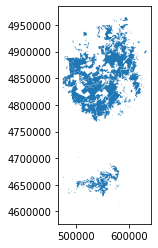

In [94]:
wild_lands.plot()

Cada GeoDataFrame contiene una columna especial de nombre `geometry`. Contiene todos los objetos geométricos que se muestran cuando llamamos al método plot().


Aunque esta columna puede contener una variedad de diferentes tipos de datos, cada entrada será típicamente uno de estos tres:
- Point (punto)
- LineString (Línea generada por interpolación de puntos ordenados)
- Polygon (Polígono)

![Representaciones de tipos de geometría](https://i.imgur.com/N1llefr.png)

La columna `geometry` de nuestro conjunto de datos contiene 2983 objetos Polígonos diferentes, cada uno de los cuales corresponde a una forma diferente en el gráfico anterior.

En la siguiente celda de código, creamos tres GeoDataFrames más, que contienen ubicaciones de campings (`Point`), senderos (`LineString`) y límites de condados (`Polygon`).

In [95]:
# Lugares de acampada en el estado de New York (Point)
POI_data = gpd.read_file(data_dir+"/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Rutas de senderismo en el estado de New York (LineString)
roads_trails = gpd.read_file(data_dir+"/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# Límites de los diferentes condados en el estado de New York (Polygon)
counties = gpd.read_file(data_dir+"/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

A continuación, creamos un mapa a partir de los cuatro GeoDataFrames.

El método `plot()` toma como entrada (opcional) varios parámetros que pueden ser usados para personalizar la apariencia. Lo más importantemente aquí es establecer un valor para `ax`. Esto permite asegurarnos que toda la información sea representada en el mismo mapa de forma superpuesta, a modo de capas (y no en 4 mapas diferentes). 

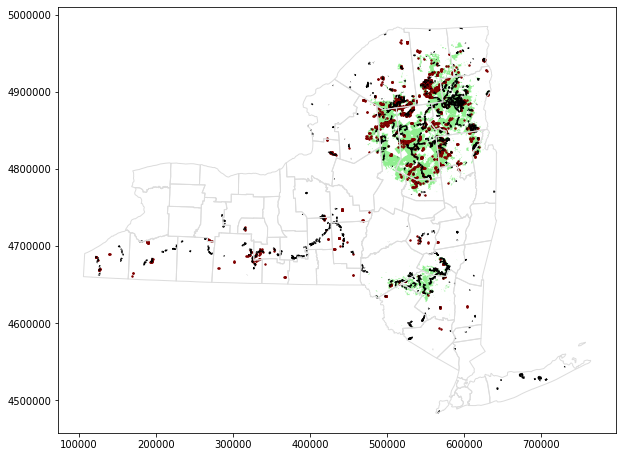

In [96]:
# Definimos el mapa base a partir de las divisiones/límites entre condados
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Añadimos bósques, lugares de acampada y rutas de senderismo sobre el mapa
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

Ahora a la vista del mapa, podemos considerar que el noroeste del estado puede ser un muy buen lugar para ir de acampada. Es el espacio que agrupa más espacio de bosques, espacio de acampadas y rutas.

## Sistemas de Coordenadas

Los mapas que creamos en este tutorial muestran la superficie de la tierra en dos dimensiones. Pero, como sabemos, el mundo es en realidad un globo tridimensional. Así que tenemos que usar un método llamado proyección de mapa para renderizarlo como una superficie plana.

Las proyecciones de los mapas pueden no ser 100% exactas. Cada proyección distorsiona la superficie de la Tierra de alguna manera, conservando al mismo tiempo alguna propiedad útil. Por ejemplo, 
- las proyecciones de área igual (como "Área igual cilíndrica de Lambert" o "Cónica de área igual de Africa Albers"). Esta es una buena opción si desea calcular el área de un país o ciudad, por ejemplo.
- las proyecciones equidistantes (como la "proyección equidistante azimutal") preservan la distancia. Esta sería una buena opción para calcular la distancia de un vuelo.

![Diferentes sistemas de referencia](https://preview.redd.it/8ssm7hfbeko21.png?width=960&crop=smart&auto=webp&s=e37ee6c496206f874fce4a896b1c5ec2870ac983) 

Lista de proyecciones de mapas ([Fuente](https://bit.ly/2kOHTBs))

En GeoPandas se utiliza un sistema de referencia de coordenadas (CRS) para mostrar cómo los puntos proyectados corresponden a ubicaciones reales en la Tierra. En este tutorial, aprenderá más sobre los sistemas de referencia de coordenadas, junto con cómo utilizarlos en GeoPandas.

Cuando se carga un mapa desde un fichero de shapefile, el sistema de coordenadas se lee desde el fichero.

In [97]:
# Cargamos un GeoDataFrame que contiene las regiones del país de Ghana
regions = gpd.read_file(data_dir+"/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

{'init': 'epsg:32630'}


¿Cómo se interpreta eso?

Los sistemas de referencia de coordenadas están referenciados por los códigos del [European Petroleum Survey Group (EPSG)](http://www.epsg.org/).

Este GeoDataFrame utiliza 'EPSG 32630', más comúnmente llamado proyección "Mercator". Esta proyección preserva los ángulos (lo que la hace útil para la navegación marítima) y distorsiona ligeramente el área.

Sin embargo, al crear un GeoDataFrame a partir de un archivo CSV ode un DataFrame normal, tenemos que configurar el CRS. EPSG 4326 corresponde a las coordenadas de latitud y longitud.

In [98]:
import pandas as pd

In [99]:
# Creamos un DataFrame con los establecimientos sanitarios en Ghana
facilities_df = pd.read_csv(data_dir+"/ghana/ghana/health_facilities.csv")

type(facilities_df)

pandas.core.frame.DataFrame

In [100]:
facilities_df.head(3)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982


In [101]:
# Generamos un GeoDataFrame a partir del DataFrame inicial
# En este apartado es clave que el fichero CSV (y el DataFrame) tuvieran una columna con la geometría de cada muestra,
# de forma que se pueda inidcar aquí

from shapely.geometry import Point

#facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude,facilities_df.Latitude))
facilities = gpd.GeoDataFrame(facilities_df, geometry=
                              [Point(x, y) for x, y in zip(facilities_df.Longitude, facilities_df.Latitude)])

type(facilities)

geopandas.geodataframe.GeoDataFrame

In [102]:
# Establecemos el sistema de coordenadas (coordinate reference system (CRS)) 
# sistema correcto: EPSG 4326 (se nos tiene que indicar)
facilities.crs = {'init': 'epsg:4326'}

# Vemos las filas del GeoDataFrame
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.408010000000001)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


En la celda de código anterior, para crear un GeoDataFrame a partir de un archivo CSV, necesitábamos usar tanto Pandas como GeoPandas:

+ Comenzamos creando un DataFrame que contiene columnas con coordenadas de latitud y longitud.
+ Para convertirlo a un GeoDataFrame, usamos gpd.GeoDataFrame().
+ La función gpd.points_from_xy() crea objetos Point a partir de las columnas de latitud y longitud.

## Re-proyección

La re-proyección se refiere al proceso de cambiar el CRS. Esto se hace en GeoPandas con el método `to_crs()`.

Al trazar varios GeoDataFrames, es importante que todos usen el mismo CRS. En la siguiente celda de código, cambiamos el CRS de las instalaciones GeoDataFrame para que coincida con el CRS de las regiones antes de trazarlo.

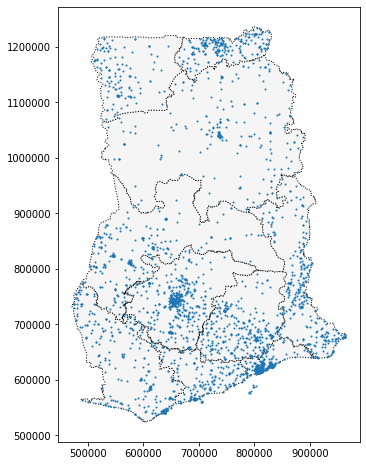

In [103]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

El método `to_crs` solo modifica la columna de "geometry". El resto de datos permanecerá igual que estaba.

In [104]:
# Las columnas de "Latitude" y "Longitude" permanecen sin cambios
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.6615150295 818986.8509002113)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.8627301247 714616.5472746015)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.3952917221 688243.47694231)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.4902964059 756478.8115280896)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.4902964059 756478.8115280896)


En caso de que el código EPSG no esté disponible en GeoPandas, podemos cambiar el CRS con lo que se conoce como la "cadena proj4" del CRS. Por ejemplo, la cadena proj4 para convertir a coordenadas de latitud/longitud es la siguiente:

In [105]:
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,POLYGON ((-1.309853975301408 7.623015645665236...
1,Brong Ahafo,POLYGON ((-2.545666609650931 8.760889146692904...
2,Central,POLYGON ((-2.067232017226479 6.294732782219592...
3,Eastern,POLYGON ((-0.2175092536753186 7.21008791478346...
4,Greater Accra,POLYGON ((0.2345584866270105 6.109855459071616...


Se puede comprobar como, si tenemos dos sistemas de CRS diferentes en cada uno de los conjuntos que se quieren representar, la superposición de ambos no se da de forma correcta.

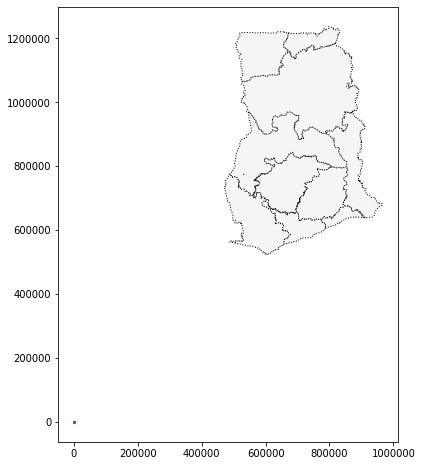

In [106]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.plot(markersize=1, ax=ax)

Sin embargo, cuando se convierten ambos al mismo sistema de coordenadas, el mapa se representa como se esperaba

In [107]:
regions = regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
facilities = facilities.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

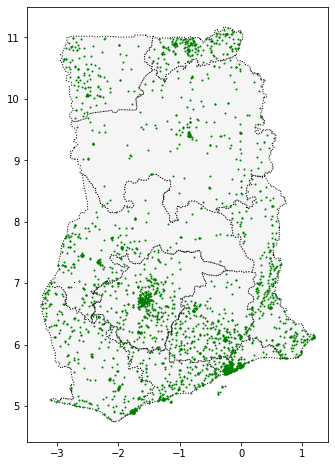

In [108]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.plot(markersize=1, ax=ax, color='green')